In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from env import username, password, host
import wrangle
from sklearn.model_selection import train_test_split

In [3]:
 df = wrangle.get_zillow_data()

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [5]:
#2. walk through the summarization and cleaning steps in your wrangle.ipynb file like we 
# did above. You may handle the missing values however you feel is appropriate and meaningful

In [6]:
df.shape

(2985217, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2982272.0,3.093362,1.271569,0.00,2.00,3.00,4.0,2.500000e+01
bathroomcnt,2982260.0,2.216196,1.078250,0.00,2.00,2.00,3.0,3.200000e+01
calculatedfinishedsquarefeet,2940120.0,1831.455292,1954.198051,1.00,1215.00,1574.00,2140.0,9.525760e+05
taxvaluedollarcnt,2950951.0,443527.931066,816336.627054,1.00,188220.00,321161.00,514072.0,3.196225e+08
yearbuilt,2937384.0,1964.437713,23.644275,1801.00,1950.00,1963.00,1981.0,2.016000e+03
taxamount,2962465.0,5408.948842,9675.566706,0.24,2468.62,4007.62,6230.5,3.823176e+06
fips,2982285.0,6048.053490,20.240825,6037.00,6037.00,6037.00,6059.0,6.111000e+03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985217 entries, 0 to 2985216
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 182.2 MB


In [9]:
df.isnull().sum()

bedroomcnt                       2945
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

Takeaways
There are null values in all columns except fips.
Fips should be data type string intead of float.
Given that there are numerous null values in most columns I am going to use the average in each column to fill in the null values.

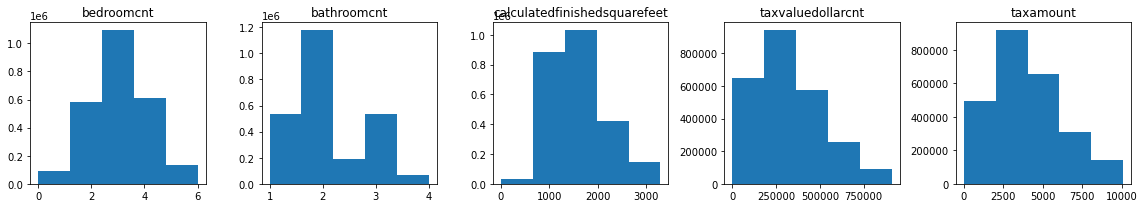

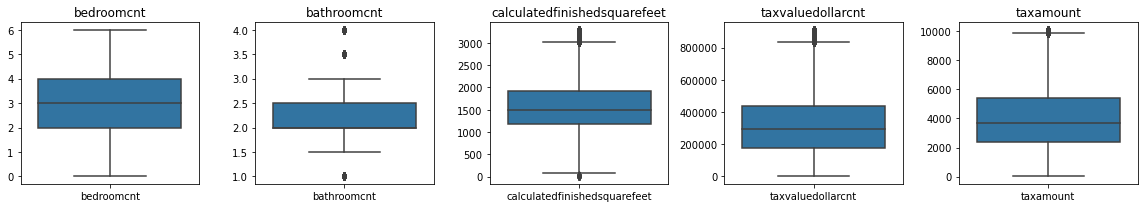

/Users/sarahwoods/codeup-data-science/regression-exercises/wrangle.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['yearbuilt']] = imputer.transform(train[['yearbuilt']])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/sarahwoods/codeup-data-science/regression-exercises/wrangle.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [10]:
train, validate, test = wrangle.prepare_zillow(df)

In [11]:
train.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
fips                            0
dtype: int64

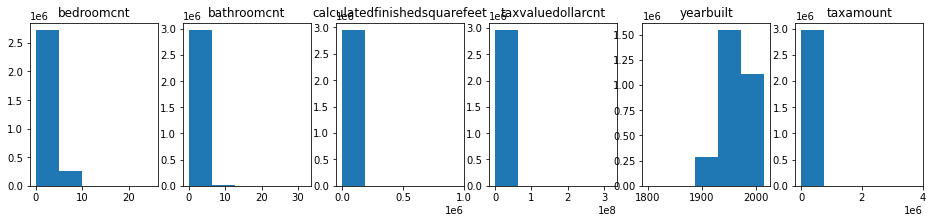

In [12]:
# the next step is to create a histogram 
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built','Unnamed: 0']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [13]:
#so now that we established we have outliers

KeyError: "['Unnamed: 0'] not found in axis"

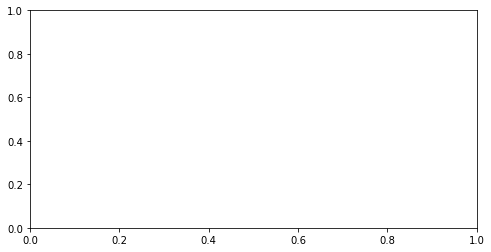

In [14]:
#now let's create boxplots
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips','Unnamed: 0']))

plt.show()

In [15]:
#n removing outliers
df = wrangle.remove_outliers(df, 1.5, ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'yearbuilt'])
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
10,4.0,4.0,3095.0,192544.0,2016.0,2460.72,6037.0
30,2.0,2.0,1090.0,357568.0,2004.0,6165.36,6037.0
33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
45,4.0,2.0,1931.0,224617.0,1957.0,2885.93,6037.0
46,0.0,1.0,700.0,387288.0,2008.0,4920.64,6037.0
...,...,...,...,...,...,...,...
2982278,3.0,2.5,1648.0,538640.0,2014.0,6370.58,6059.0
2982280,2.0,1.0,798.0,469300.0,2006.0,5764.45,6037.0
2982281,3.0,3.0,1526.0,594022.0,2014.0,7343.47,6037.0
2982282,4.0,4.0,2110.0,554009.0,2014.0,6761.20,6037.0


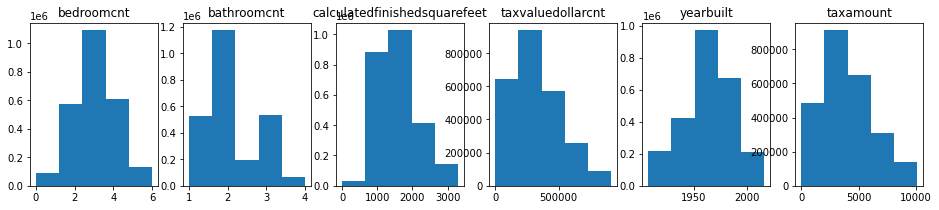

In [16]:
# visualize the changes in a histogram 
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built','Unnamed: 0']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [ ]:
#visualize the changes in  boxplots
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns='fips'))

plt.show()

In [ ]:
#visualize the changes in  boxplots
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips']))

plt.show()

In [ ]:
#More preparation - avoiding target leakage
df = df.drop(columns=['taxamount'])

In [ ]:
#Split the data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [ ]:
def wrangle_zillow(df):
    wrangle.get_zillow_data(df)
    wrangle.prepare_zillow(df)

wrangle_zillow(df)